# Sales Price Prediction 

# Problem Statement
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product

# Importing the necessary libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [42]:
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Analysis

In [43]:
data.shape

(200, 5)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [48]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [50]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Dropping redundant columns

In [58]:
data.drop(columns='Unnamed: 0',inplace=True)

# Data Visualization

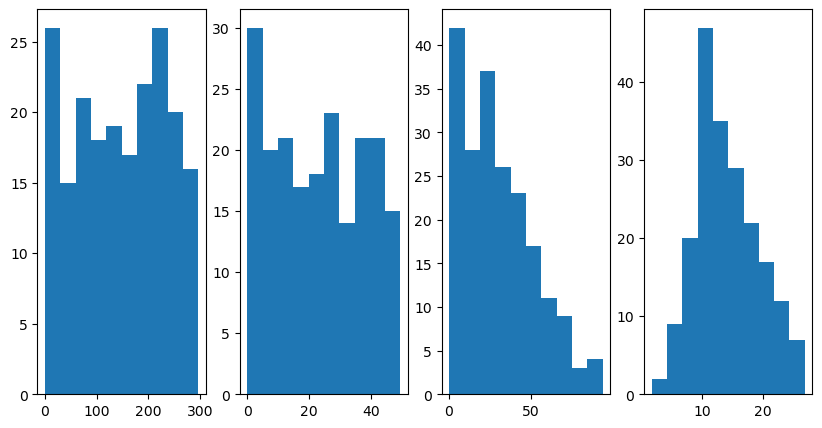

In [92]:
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.hist(data['TV'])

plt.subplot(1,4,2)
plt.hist(data['Radio'])

plt.subplot(1,4,3)
plt.hist(data['Newspaper'])

plt.subplot(1,4,4)
plt.hist(data['Sales'])
plt.show()

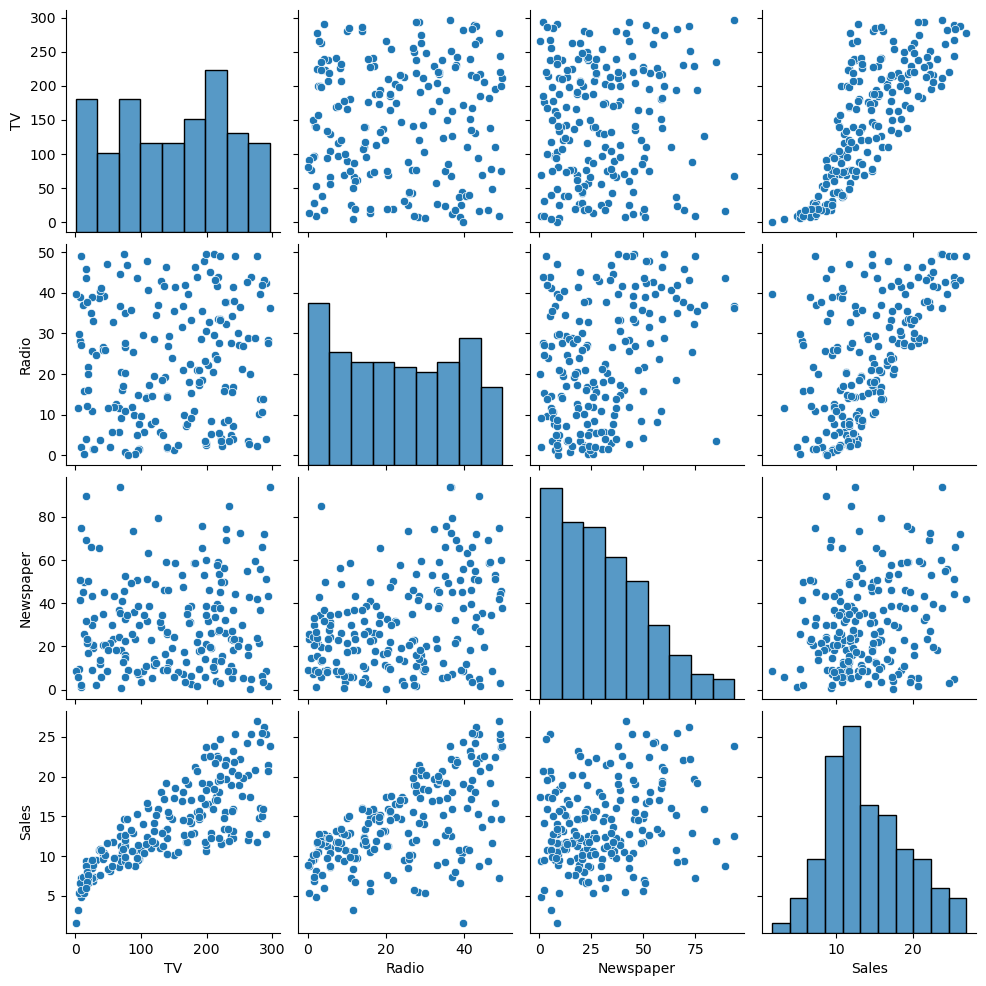

In [93]:
sns.pairplot(data)

# Removing outliers

In [82]:
def limiter(x):
    if x>ulimit:
        return ulimit
    elif x<llimit:
        return llimimt
    else:
        return x

In [83]:
q1=data['Newspaper'].quantile(0.25)
q3=data['Newspaper'].quantile(0.75)
IQR=q3-q1

llimit=q1-1.5*IQR
ulimit=q3+1.5*IQR

data['Newspaper']=data['Newspaper'].apply(limiter)

# Splitting and scaling the data

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=data.drop(columns='Sales')
Y=data.iloc[:,3:]

X.shape,Y.shape

((200, 3), (200, 1))

In [85]:
from sklearn.model_selection import train_test_split as tts

xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.25,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((150, 3), (50, 3), (150, 1), (50, 1))

In [86]:
#scaling train and test sets
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

ytrain=scaler.fit_transform(ytrain)
ytest=scaler.transform(ytest)

# Training the model

In [87]:
from sklearn.linear_model import LinearRegression 

lr=LinearRegression()

lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)

# Performance metrics

In [88]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
print(mae(ytest,y_pred))
print(mse(ytest,y_pred))

0.27074967319630866
0.10748178069971376


In [89]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.8935765301545867

In [90]:
lr.coef_,lr.intercept_

(array([[0.74466666, 0.54970193, 0.01006793]]), array([2.48307832e-17]))

In [ ]:
# hence we can predict the sales price with an accuracy of 89%